In [ ]:
Q1

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("data_9.csv")

X = data.drop("Result", axis=1)
y = data["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

print("AdaBoost Model Performance:")
print("Accuracy:", accuracy_ada)
print("Confusion Matrix:\n", conf_matrix_ada)
print("Classification Report:\n", class_report_ada)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nRandomForest Model Performance:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


AdaBoost Model Performance:
Accuracy: 1.0
Confusion Matrix:
 [[6 0]
 [0 5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


RandomForest Model Performance:
Accuracy: 0.9090909090909091
Confusion Matrix:
 [[6 0]
 [1 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



In [4]:
Q2

NameError: name 'Q2' is not defined

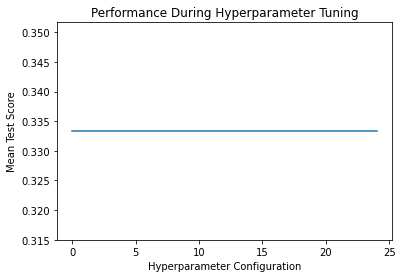

In [11]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_train, y_train)
y_pred_optimized = grid_search.predict(X_test)

mean_test_scores = grid_search.cv_results_['mean_test_score']
plt.plot(range(len(mean_test_scores)), mean_test_scores)
plt.xlabel('Hyperparameter Configuration')
plt.ylabel('Mean Test Score')
plt.title('Performance During Hyperparameter Tuning')
plt.show()
